In [1]:
from sklearn.model_selection import train_test_split

# Split the data into training and temp (validation + test) sets
X_temp, X_train, y_temp, y_train = train_test_split(Data, labels, test_size=0.6, stratify=labels, random_state=42)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


NameError: name 'Data' is not defined

In [10]:
_, eigenfaces = get_PCA(X_train, 0.95)

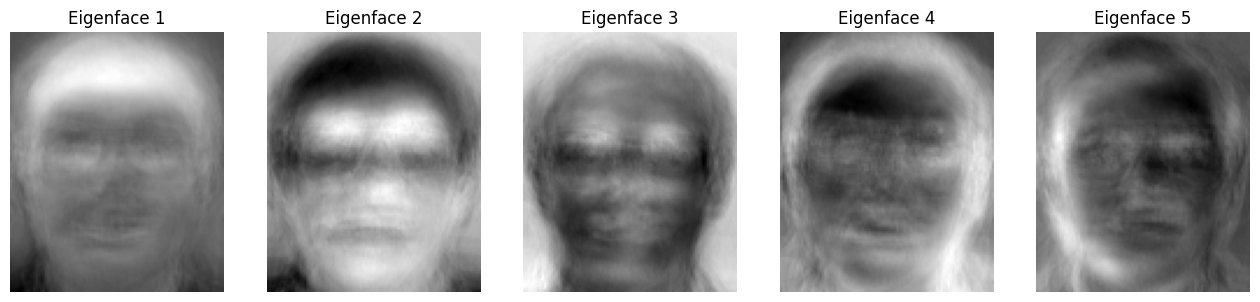

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(16, 10))
for i in range(5):
    image_array = np.reshape(eigenfaces[:, i], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title("Eigenface " + str(i + 1))
    axs[i].axis("off")
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def Test_PCA(training_data, testing_data, training_labels, testing_labels, alpha, k):
    mean_face, eigenfaces = get_PCA(training_data, alpha)
    X_train_pca, X_test_pca = PCA_Projected_data(training_data, testing_data, mean_face, eigenfaces)
    knn = KNeighborsClassifier(k, weights="distance")
    knn.fit(X_train_pca, training_labels.ravel())
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(testing_labels, y_pred.ravel())
    f1 = f1_score(testing_labels, y_pred.ravel(), average='weighted')
    recall = recall_score(testing_labels, y_pred.ravel(), average='weighted')
    precision = precision_score(testing_labels, y_pred.ravel(), average='weighted')
    return accuracy, f1, recall, precision

# Run the Test_PCA function with k=5
accuracy, f1, recall, precision = Test_PCA(X_train, X_test, y_train, y_test, alpha=0.95, k=5)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.925
F1 Score: 0.9242857142857142
Recall: 0.925
Precision: 0.96
